## 习题 2.5

In [1]:
data <- read.csv("./ex_2_5.csv"); data

x,y
<dbl>,<dbl>
0.05,5.9421
0.15,5.4691
0.25,5.8724
0.35,5.1815
0.45,5.1955
0.55,5.2487
0.65,5.1356
0.75,5.2260
0.85,5.0813


In [2]:
attach(data)

### (1)

![题（1）](https://tva1.sinaimg.cn/large/008i3skNly1gr5gs7pbp2j31m209stea.jpg)

首先尝试拟合线性回归模型 

$$
\hat Y =\beta_0 + \beta_1 X + \epsilon, \quad \epsilon \sim N
$$

In [3]:
linear_model <- lm(y ~ x, data)
summary(linear_model)


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72831 -0.17147 -0.08433  0.16405  0.70025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.319696   0.165202  32.201   <2e-16 ***
x           0.003054   0.143114   0.021    0.983    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3691 on 18 degrees of freedom
Multiple R-squared:  2.53e-05,	Adjusted R-squared:  -0.05553 
F-statistic: 0.0004554 on 1 and 18 DF,  p-value: 0.9832


从拟合结果的检验可以看出，$R^2$ 趋于 $0$，说明该模型拟合效果不好；同时 $x$ 对应的 P 值非常高，X 对 Y 没有显著影响。

方差分析：

In [4]:
summary(aov(linear_model))

            Df Sum Sq Mean Sq F value Pr(>F)
x            1 0.0001 0.00006       0  0.983
Residuals   18 2.4516 0.13620               

这也证实了前面的结论。

下面作出各种残差图：

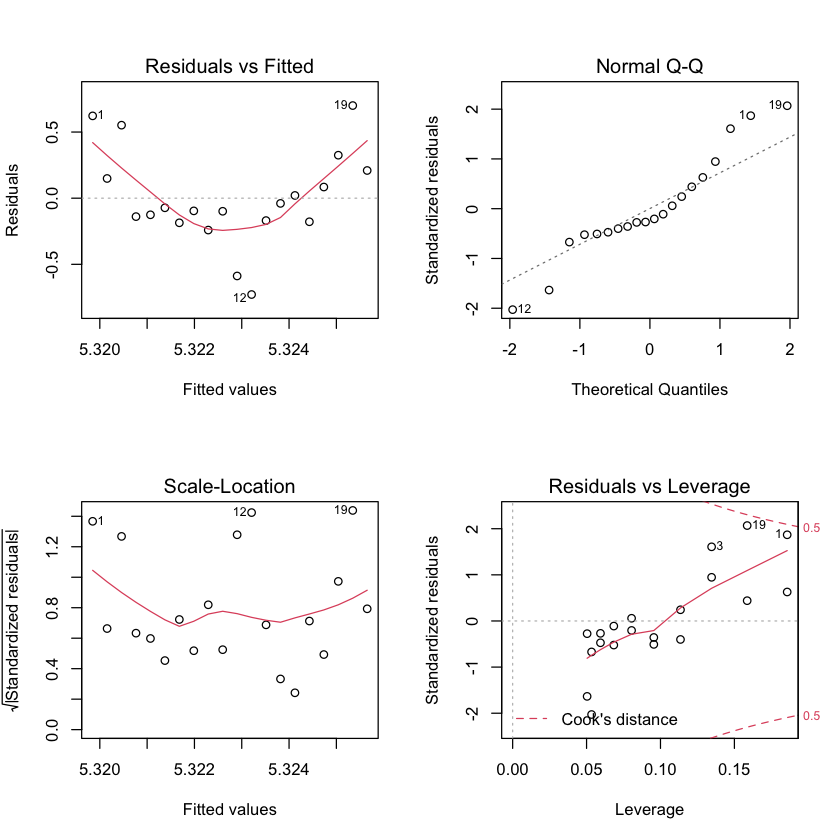

In [5]:
par(mfrow=c(2,2))
plot(linear_model)

可以看出残差还是近似正太分布的。

下面作出 $x$、$y$ 的散点图：

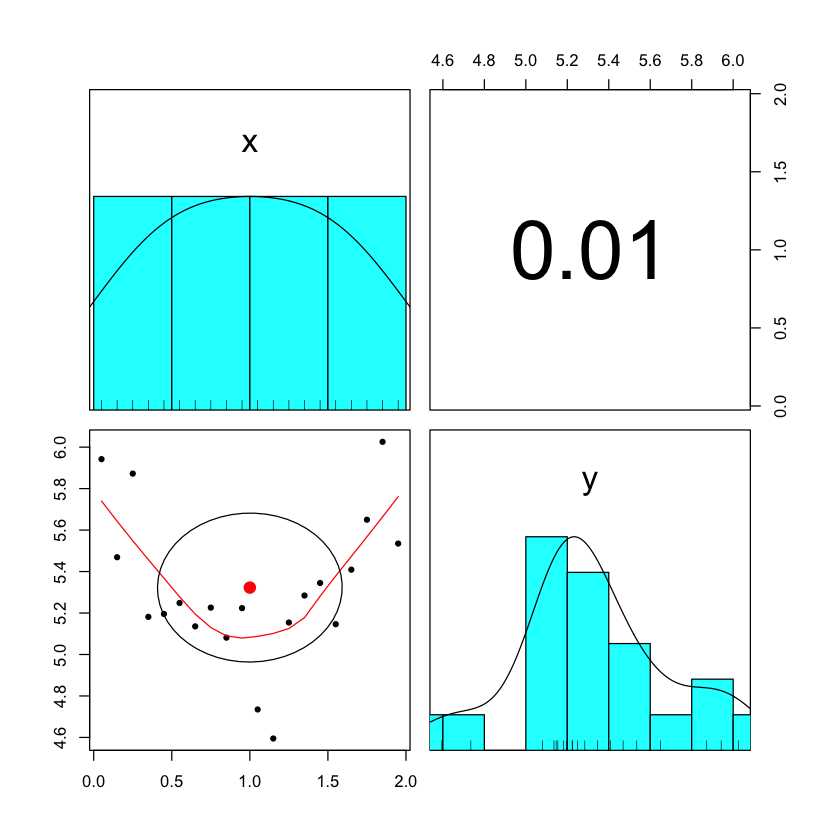

In [6]:
library(psych)
pairs.panels(data)

感觉上，$x$、$y$ 呈现二次关系，再尝试作出 $y$ 与 $x^2$ 及 $x$ 的散点图：

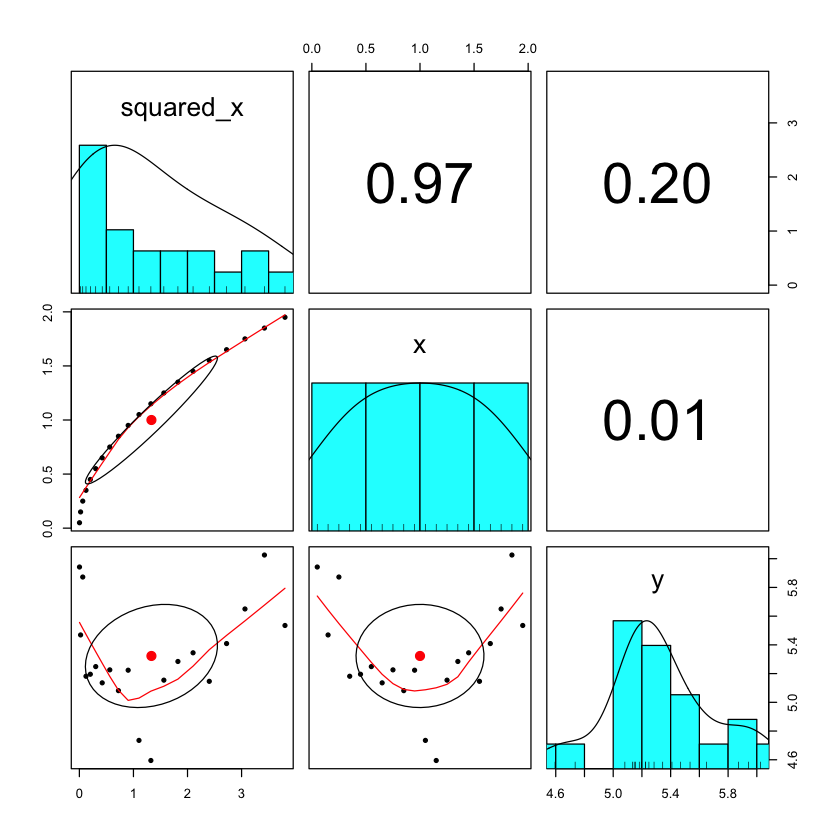

In [7]:
pairs.panels(data.frame(`squared_x`=x^2, `x`=x, `y`=y))

可以看出 $y$ 与 $x^2$ 的相关性要优于线性。所以下面尝试做带有二次项的拟合：

$$
\hat Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon, \quad \epsilon \sim N
$$

In [8]:
# ref https://zhuanlan.zhihu.com/p/184923047

fm <- lm(y ~ x + I(x^2), data)
summary(fm)


Call:
lm(formula = y ~ x + I(x^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43449 -0.16752  0.05168  0.14782  0.33394 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.9524     0.1529  38.942  < 2e-16 ***
x            -1.8926     0.3535  -5.354 5.26e-05 ***
I(x^2)        0.9478     0.1712   5.537 3.62e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2268 on 17 degrees of freedom
Multiple R-squared:  0.6433,	Adjusted R-squared:  0.6013 
F-statistic: 15.33 on 2 and 17 DF,  p-value: 0.0001565


得到回归方程：

$$
\hat Y = 5.9524 -1.8926 X + 0.9478 X^2 
$$

这一次拟合效果有了显著提升，从检验可以看出，加入的二次项 $X^2$ 对 $Y$ 有显著影响。
模型 p 值小于 $0.05$，可以认为假设比较合理。

下面进一步做方差分析：

In [9]:
summary(aov(fm))

            Df Sum Sq Mean Sq F value   Pr(>F)    
x            1 0.0001  0.0001   0.001    0.973    
I(x^2)       1 1.5771  1.5771  30.658 3.62e-05 ***
Residuals   17 0.8745  0.0514                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

可以看到 $X^2$ 对 $Y$ 的影响显著，进一步证明了模型的合理性。

再作出各种残差图：

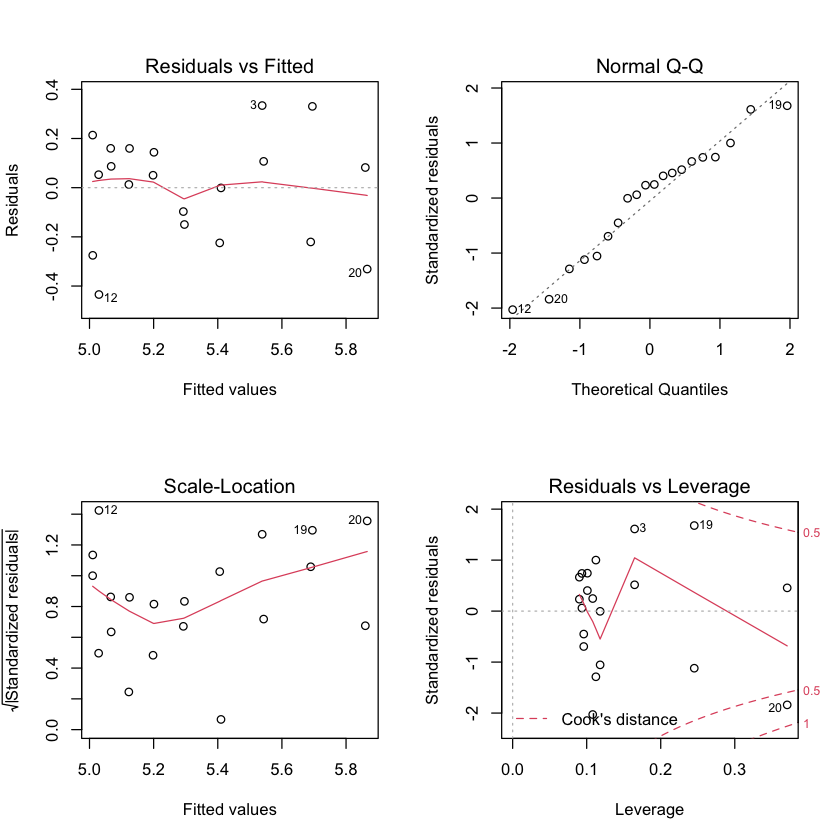

In [10]:
par(mfrow=c(2,2))
plot(fm)

- 左下图：**标准化残差-拟合**：数据随机分布，无明显的形状特征，说明残差数据表现比较好。
- 右上图：**标准化残差 Q-Q**：数据点按对角直线排列，直观上符合正态分布。

由这些图，可以认为相应的线性回归模型以及误差的独立正态分布的假设是合理的。

> ref https://zhuanlan.zhihu.com/p/184923047

进一步，对残差做 Shapiro-Wilk 正态检验：

In [11]:
shapiro.test(residuals(fm))


	Shapiro-Wilk normality test

data:  residuals(fm)
W = 0.95731, p-value = 0.4917


原假设 $H_0$ 是数据服从正态分布，这里 $p>0.05$，接受原假设，认为数据服从正态分布。

最后，拟合出的回归方程

$$
\hat Y = 5.9524 -1.8926 X + 0.9478 X^2
$$

与题目给出的真实模型 

$$
\begin{aligned}
Y&=5+(X-1)^2\\
&=6-2X+X^2
\end{aligned}
$$ 

二者相比，形式一致，系数相差不大。拟合的效果比较好，模型选择正确。

### (2)

![题（2）](https://tva1.sinaimg.cn/large/008i3skNly1gr5il00jvtj31mm04sq5e.jpg)

在 R 中实现 Box-Cox 变换，需要通过 `MASS` 包：

In [12]:
library(MASS)

变换过程需要分两步[^ref: https://blog.csdn.net/fitzgerald0/article/details/75212215 ]：

1. 第一步：拟合 Box-Cox 模型，得到 `lambda` 值

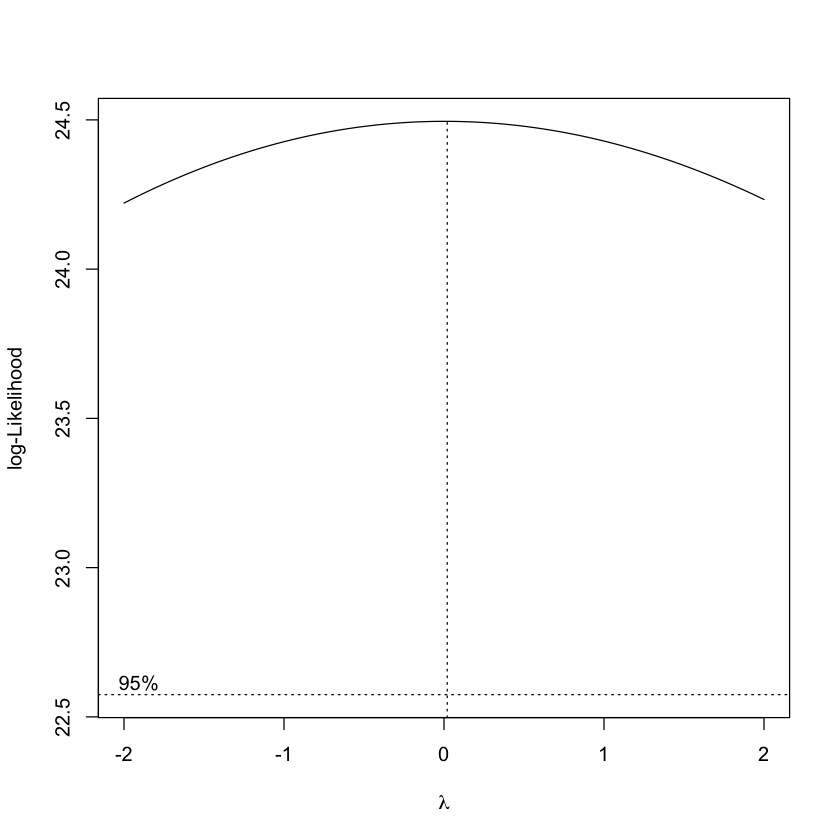

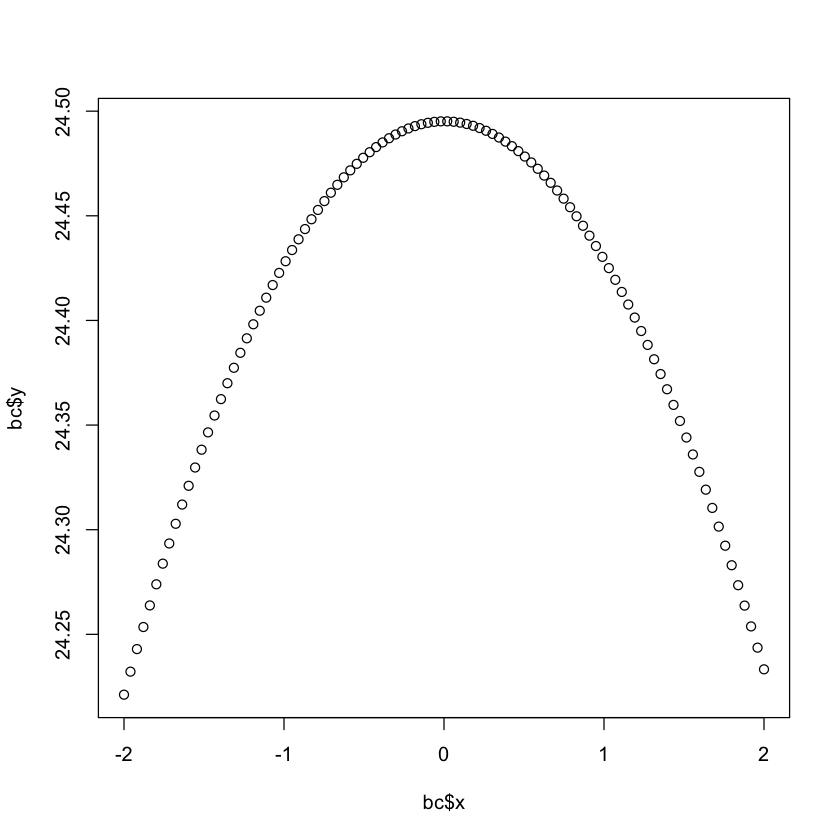

In [13]:
bc <- boxcox(y ~ ., data=data)  # . 表示除因变量外的所有变量
plot(bc)

In [14]:
idx <- which(bc$y==max(bc$y))
lambda <- bc$x[idx]
lambda

[1] 0.02020202

得到 $\lambda=0.0202020202020203$， 即 $\lambda-\textrm{logLikelihood}$ 图中的最高点。

2. 将上一步 Box-Cox 变换的 $\lambda$ 值代入 

$$
Y^{(\lambda)} = \left\{\begin{aligned}
\frac{Y^\lambda-1}{\lambda}, && \lambda \ne 0 \\
\ln Y, && \lambda = 0
\end{aligned}\right.
$$ 

拟合变换后的变量关于 $X$ 的简单线性回归模型：

In [15]:
fmbc <- lm((y^lambda-1)/lambda ~ x, data)
summary(fmbc)


Call:
lm(formula = (y^lambda - 1)/lambda ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14976 -0.03164 -0.01436  0.03356  0.13019 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.6978320  0.0320650  52.950   <2e-16 ***
x           0.0005291  0.0277778   0.019    0.985    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07163 on 18 degrees of freedom
Multiple R-squared:  2.016e-05,	Adjusted R-squared:  -0.05553 
F-statistic: 0.0003628 on 1 and 18 DF,  p-value: 0.985


In [16]:
summary(aov(fmbc))

            Df  Sum Sq  Mean Sq F value Pr(>F)
x            1 0.00000 0.000002       0  0.985
Residuals   18 0.09236 0.005131               

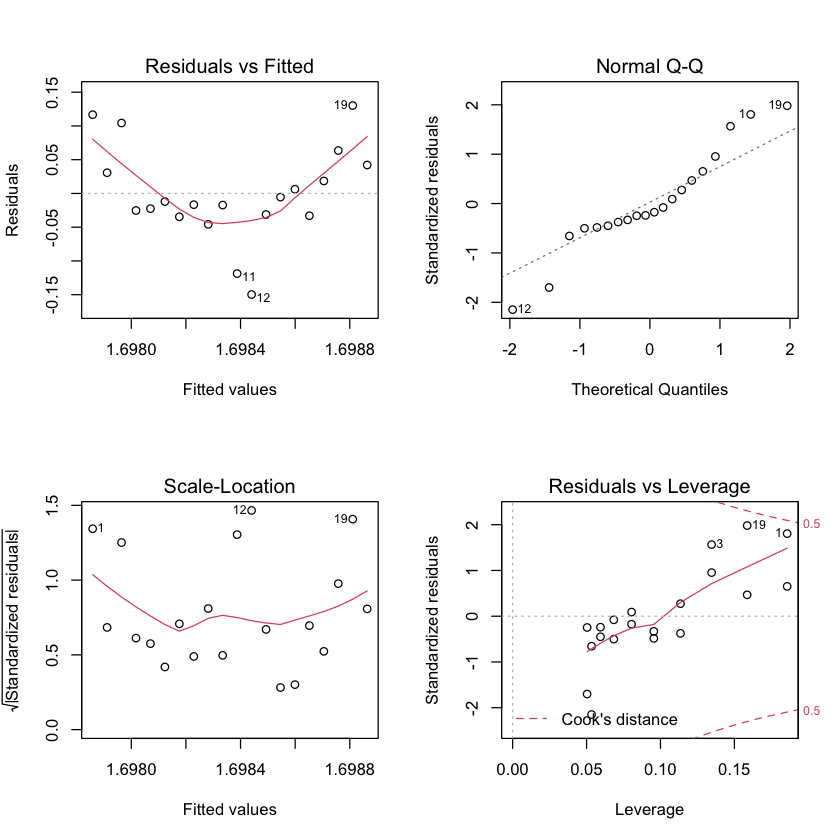

In [17]:
par(mfrow=c(2,2))
plot(fmbc)

In [18]:
shapiro.test(residuals(fmbc))


	Shapiro-Wilk normality test

data:  residuals(fmbc)
W = 0.94268, p-value = 0.2693


从上面拟合结果回归分析、方差分析、残差图、残差正态性检验结果可以看出，Box-Cox 变化没有带来明显的改进。

做 Box-Cox 变换的意义在于使满足线性模型的正态性假设，而由前面第 (1) 题的数据拟合结果，已经满足正态性，这里再作 Box-Cox 变换没有意义。

> ref: 
> https://ask.hellobi.com/blog/R_shequ/18371
> 
> https://zhuanlan.zhihu.com/p/40125782

In [19]:
detach(data)